# Fashion Mnist 数据集分类

In [8]:
import tensorflow as tf
import os
os.environ["OMP_NUM_THREADS"] = "4"
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import *
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统常用 SimHei
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

## 数据集结构

In [10]:
# 加载训练集
train = pd.read_csv("./dataset/fashion-mnist_train.csv")

### 训练集包含600000张28x28像素的图片，以及标签值 

In [12]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# 加载测试集
test = pd.read_csv("./dataset/fashion-mnist_test.csv")

### 测试集包含100000张28x28像素的图片，以及标签值 

In [15]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
# 加载数据
(train_images, train_labels), (test_images, test_labels) = load_data(train,test)

In [17]:
train_images.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [18]:
train_images,train_labels

(array([[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        ...,
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,

In [20]:
class_names = [' T恤', '裤子', '套衫', '连衣裙', '外套','凉鞋', '衬衫', '运动鞋', '包', '踝靴']

展示训练集图片

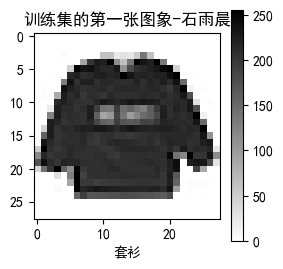

In [21]:
# 可视化
## 创建新的 3×3 图像窗口
plt.figure(figsize=(3,3))
## 显示图像 (填入图像)
plt.imshow(train_images[0],cmap=plt.cm.binary)
# x轴标签上显示图像类别名称
plt.xlabel(class_names[train_labels[0]])
# 添加颜色条
plt.colorbar()
# 添加中文标题
plt.title("训练集的第一张图象-石雨晨")
# 关闭网格
plt.grid(False)

## 训练模型并评估

### 归一化预处理

1、归一化处理：

代码将train_images和test_images的像素值除以255.0，将像素值从[0, 255]范围归一化到[0, 1]范围。确保输入特征在同一量级上，加快梯度下降的收敛速度，并提高模型的训练稳定性。

2、提取标签和特征：

train_labels和test_labels从数据集中提取标签（label列），存储为数组形式，用于后续的分类任务。
train_flat和test_flat通过drop方法移除标签列，保留特征（像素值），并使用reshape方法将数据展平。

展平操作将每个28x28的图像（共784个像素）从二维数组转换为一维数组，形状分别为(60000, 784)（训练集）和(10000, 784)（测试集），以适配MLP模型的输入要求。

In [24]:
# 归一化预处理
train_images = train_images / 255.0
test_images = test_images / 255.0

In [25]:
# 提取标签和特征
train_labels = train['label'].values
test_labels = test['label'].values
train_flat = train.drop('label', axis=1).values.reshape((len(train), -1))  # 展平为 (60000, 784)
test_flat = test.drop('label', axis=1).values.reshape((len(test), -1))    # 展平为 (10000, 784)

# 打印形状验证
print(f"训练数据形状: {train_flat.shape}")
print(f"测试数据形状: {test_flat.shape}")

训练数据形状: (60000, 784)
测试数据形状: (10000, 784)


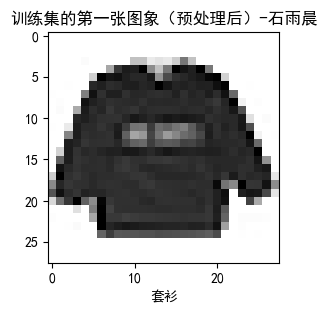

In [26]:
# 显示预处理完之后的图像
plt.figure(figsize=(3,3))
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.title("训练集的第一张图象（预处理后）-石雨晨")
plt.xlabel(class_names[train_labels[0]])
plt.grid(False)

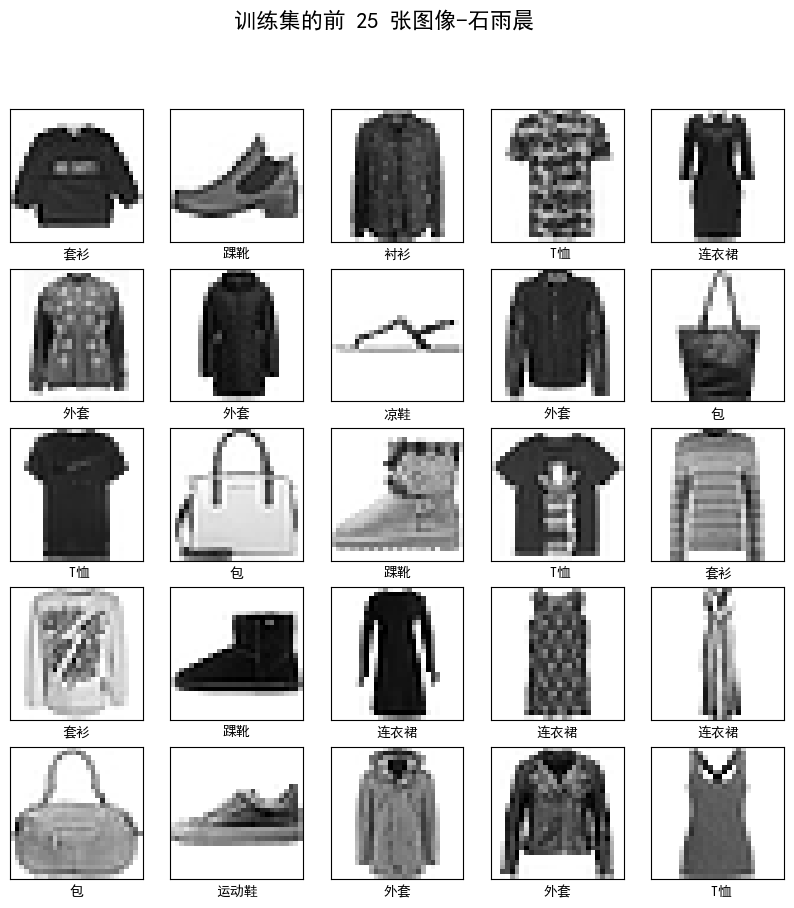

In [27]:
#显示训练集中的前 25 张图像，并在每张图像下显示类别名称
plt.figure(figsize=(10,10))
plt.suptitle("训练集的前 25 张图像-石雨晨", fontsize=16)
for i in range(25):
    ## 在当前图下生成子图 5*5个图
    plt.subplot(5,5,i+1)
    # 关闭坐标轴刻度
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #显示 当前图片的类别
    plt.xlabel(class_names[train_labels[i]])


In [28]:
train_labels[:25]

array([2, 9, 6, 0, 3, 4, 4, 5, 4, 8, 0, 8, 9, 0, 2, 2, 9, 3, 3, 3, 8, 7,
       4, 4, 0], dtype=int64)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

MLP 模型通过 Sequential 定义，包含以下层：

In [33]:
model = Sequential([
     # 显式定义输入层
    Input(shape=(28, 28)), 
    # 将28×28图像展平为784维向量
    Flatten(),   
    # 隐藏层，使用ReLU激活函数
    Dense(128, activation='relu'),
    Dropout(0.4),
     # 输出层，原始logits
    Dense(10) 
])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### 训练模型

In [45]:
# 编译模型
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

每轮训练均显示数据集准确率和损失，测试集准确率和损失

In [54]:
# 训练模型，测试集验证准确率
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7369 - loss: 0.7540 - val_accuracy: 0.8477 - val_loss: 0.4213
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8368 - loss: 0.4537 - val_accuracy: 0.8656 - val_loss: 0.3742
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8474 - loss: 0.4205 - val_accuracy: 0.8659 - val_loss: 0.3638
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8572 - loss: 0.3940 - val_accuracy: 0.8737 - val_loss: 0.3494
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8626 - loss: 0.3786 - val_accuracy: 0.8801 - val_loss: 0.3333
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8692 - loss: 0.3600 - val_accuracy: 0.8762 - val_loss: 0.3381
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8713 - loss: 0.3521 - val_accuracy: 0.8780 - val_loss: 0.3319
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8706 - loss: 0.3478 - 

In [56]:
# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n 测试准确率: ', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8877 - loss: 0.3135

 测试准确率:  0.8877000212669373


### 数据可视化

In [59]:
# 预测并可视化结果
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


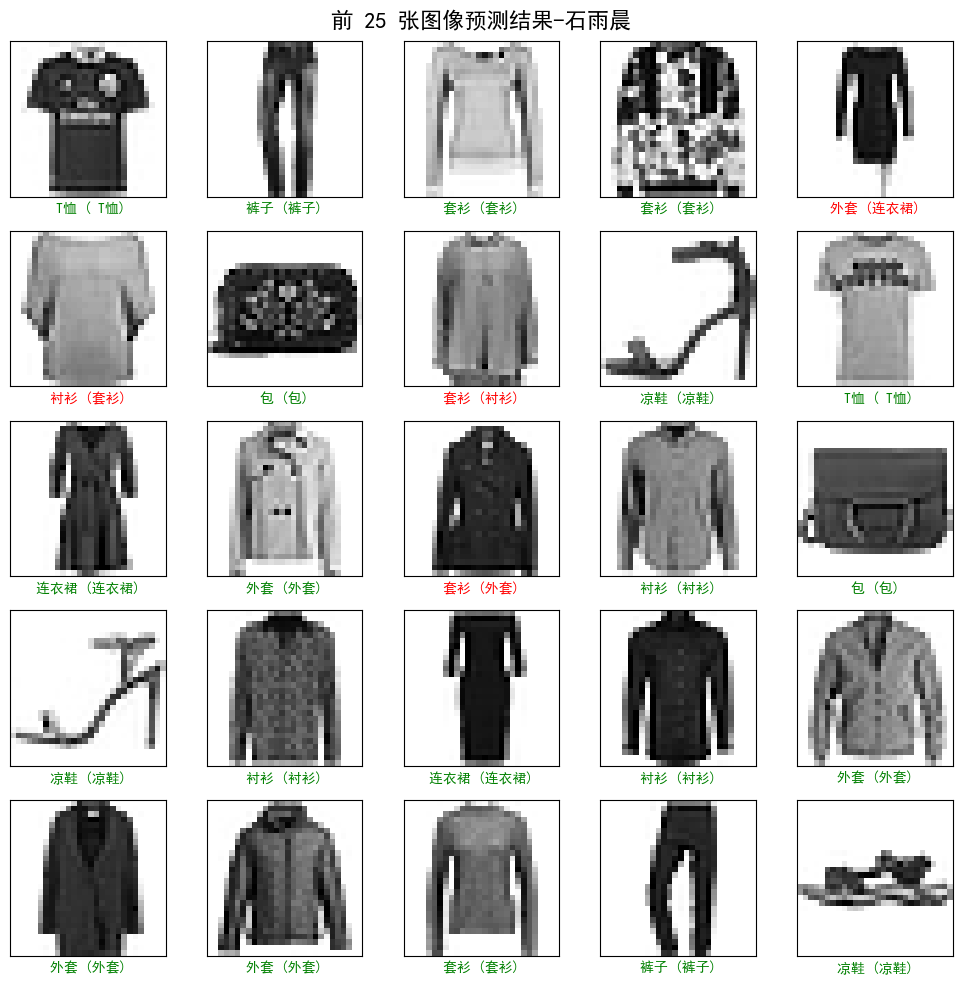

In [61]:
# 绘制前25个测试样本的预测结果
plt.figure(figsize=(10,10))
plt.suptitle("前 25 张图像预测结果-石雨晨", fontsize=16)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
    
plt.tight_layout()
plt.show()

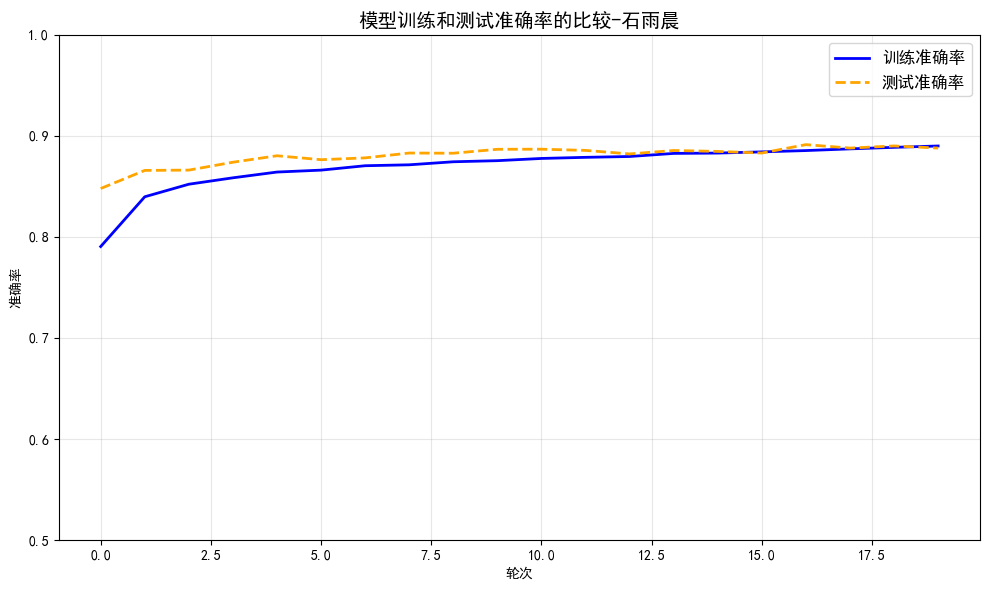

In [62]:
# 可视化训练过程
plt.figure(figsize=(10, 6))  # 设置图表大小
plt.plot(history.history['accuracy'], label='训练准确率', color='blue', linestyle='-', linewidth=2)
plt.plot(history.history['val_accuracy'], label='测试准确率', color='orange', linestyle='--', linewidth=2)
plt.xlabel('轮次')
plt.ylabel('准确率')
plt.ylim([0.5, 1])  # 设置y轴范围
plt.grid(True, alpha=0.3)  # 添加网格线
plt.title('模型训练和测试准确率的比较-石雨晨', fontsize=14)  # 添加标题
plt.legend(fontsize=12)  # 设置图例字体大小
plt.tight_layout()  # 自动调整布局
plt.show()

模型在训练数据上表现很好，训练准确率和测试准确率十分相近。

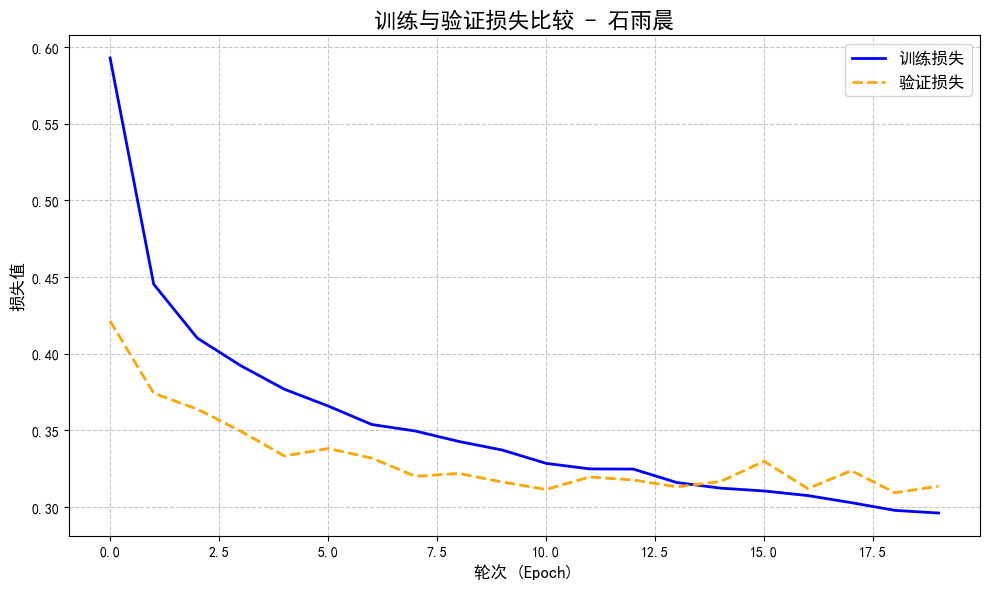

In [66]:
# 损失曲线
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='训练损失', color='blue', linestyle='-', linewidth=2)
plt.plot(history.history['val_loss'], label='验证损失', color='orange', linestyle='--', linewidth=2)
plt.title('训练与验证损失比较 - 石雨晨', fontsize=16)
plt.xlabel('轮次 (Epoch)', fontsize=12)
plt.ylabel('损失值', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('loss_comparison_plot.png')
plt.show()

训练损失持续下降，模型在训练数据上优化得很好。而验证损失在初期下降后未能继续降低，具有一定的波动性，模型在验证数据上的表现不稳定。

### 模型评估

t-SNE 降维和聚类结果：

t-SNE 将数据降维到 2D，方便在二维平面上绘制散点图。保留数据点之间的局部相似性（即相近的点在降维后仍然相近），可以通过散点图观察数据的分布和类别分离情况。如果相同类别的点在 t-SNE 图中聚集得很好，说明原始特征（展平后的像素值）具有一定的区分能力；如果类别之间重叠较多，说明特征区分能力较弱。

K-Means 聚类，可以检查 t-SNE 降维后是否仍然保留了数据的类别结构。如果 K-Means 的聚类结果与真实标签高度一致，说明 t-SNE 降维保留了类别信息。K-Means 不依赖真实标签（train_labels_sample），而是基于降维后的数据分布进行聚类。用来评估数据的内在结构是否与真实类别一致。


In [71]:
# 数据标准化
scaler = StandardScaler()
train_flat_scaled = scaler.fit_transform(train_flat)
test_flat_scaled = scaler.transform(test_flat)

In [72]:
# t-SNE 降维
# 为加速计算，随机采样训练集的一部分（例如 5000 条数据）
np.random.seed(42)
sample_size = 5000
sample_indices = np.random.choice(train_flat_scaled.shape[0], sample_size, replace=False)
train_flat_sample = train_flat_scaled[sample_indices]
train_labels_sample = train_labels[sample_indices]

In [73]:
# 应用 t-SNE 降维到 2D
tsne = TSNE(n_components=2, random_state=42, n_jobs=1)
train_tsne = tsne.fit_transform(train_flat_sample)

# K-Means 聚类
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(train_tsne)

观察两图中数据点的分布形状是否相似。真实标签图反映了类别间的自然分离，K-Means 图反映了无监督聚类的结果。

([], [])

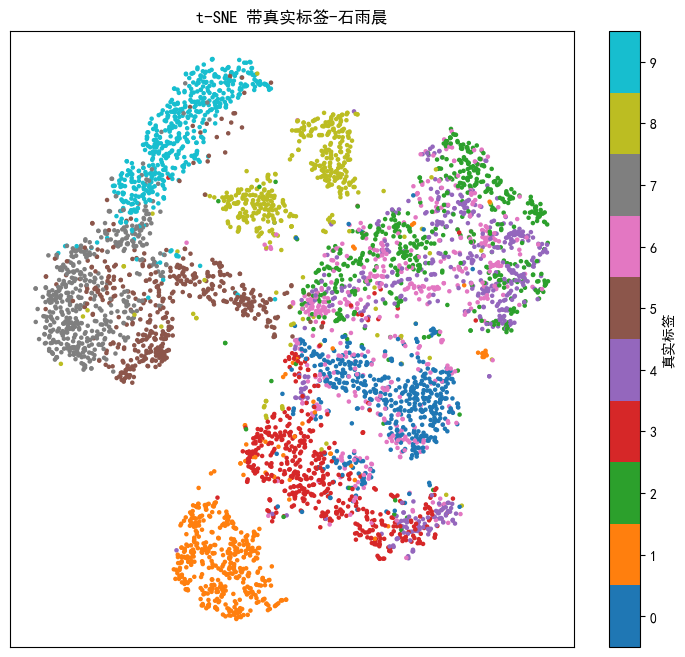

In [77]:
# 可视化 t-SNE 结果与真实标签
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
scatter = plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=train_labels_sample, cmap='tab10', s=5)
plt.title("t-SNE 带真实标签-石雨晨")
plt.colorbar(scatter, ticks=range(10), label='真实标签')
plt.clim(-0.5, 9.5)
plt.xticks([])
plt.yticks([])

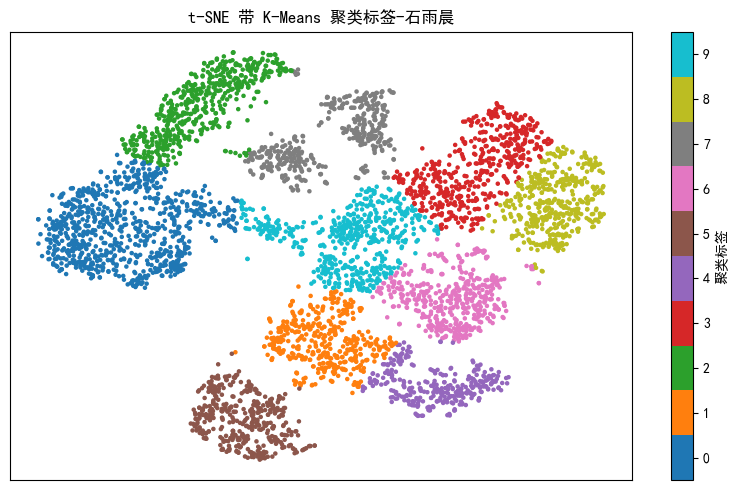

In [78]:
# 可视化 t-SNE 结果与 K-Means 聚类标签
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 2)
scatter = plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=kmeans_labels, cmap='tab10', s=5)
plt.title("t-SNE 带 K-Means 聚类标签-石雨晨")
plt.colorbar(scatter, ticks=range(10), label='聚类标签')
plt.clim(-0.5, 9.5)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

比较相同区域的颜色是否一致。如果一致，说明 K-Means 成功捕获了真实类别结构；如果不一致，说明聚类效果有限。

In [80]:
# 定量评估聚类效果（使用调整兰德指数）
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(train_labels_sample, kmeans_labels)
print(f"真实标签与 K-Means 聚类标签的调整兰德指数 (ARI): {ari_score:.4f}")

真实标签与 K-Means 聚类标签的调整兰德指数 (ARI): 0.4815


ARI 值为 0.4815 表明 K-Means 聚类与真实标签有一定程度的匹配。
聚类结果与真实标签一致性较好，说明分类效果较好

## 预测和验证预测

### 训练好模型后，我们可以用它来对一些图像进行预测。可附加 softmax 层，将模型的线性输出（即 logits）转换为概率。

In [84]:
# 在原有模型的基础上添加 Softmax 层
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()
])

In [85]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [86]:
predictions[0]

array([6.6958767e-01, 4.3230644e-10, 6.6326681e-04, 2.1518566e-04,
       2.4587373e-06, 2.0389857e-13, 3.2952556e-01, 3.2760554e-17,
       5.8525093e-06, 3.0920940e-15], dtype=float32)

这是一个包含 10 个数字的数组。每个数字代表模型对图像对应 10 种不同服装类别的 "置信度"。你可以查看哪个标签的置信度值最高：

In [88]:
np.argmax(predictions[0])

0

In [89]:
test_labels[0]

0

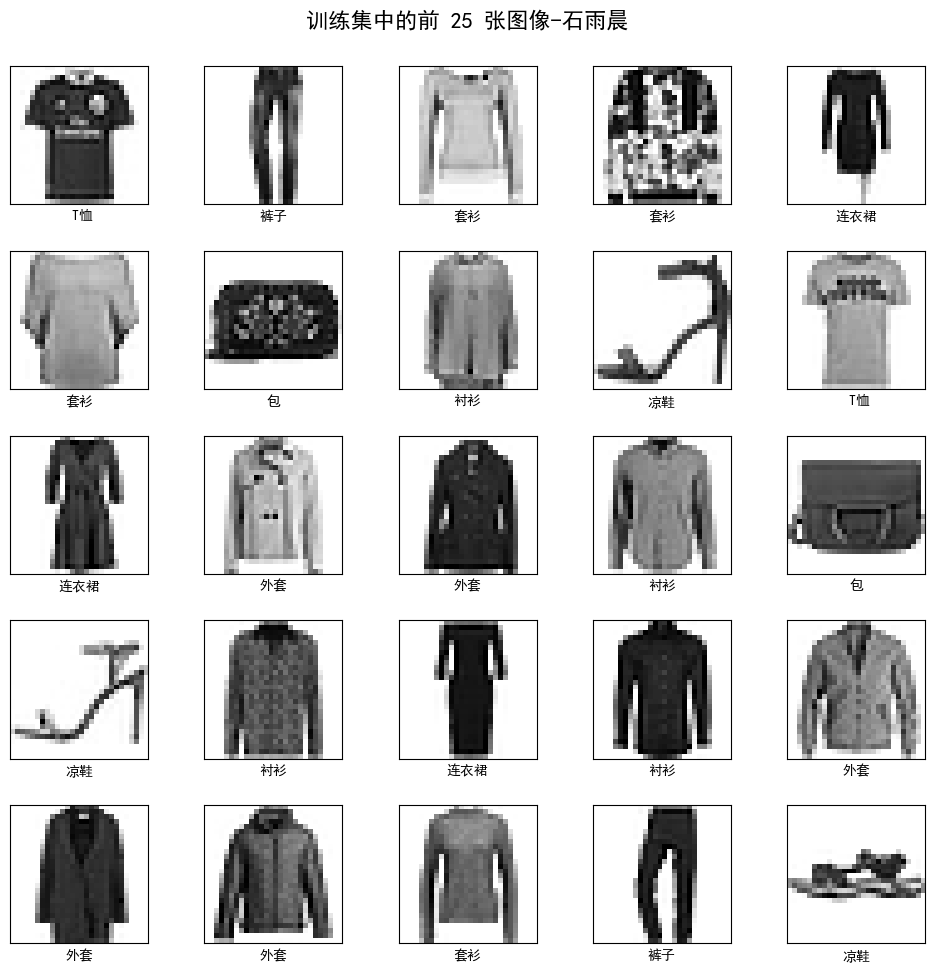

In [90]:
#显示训练集中的前 25 张图像，并在每张图像下显示类别名称
plt.figure(figsize=(10,10), frameon=False)
plt.suptitle("训练集中的前 25 张图像-石雨晨", fontsize=16)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    
plt.tight_layout(pad=2.0)  # 增加子图与外边框的内边距
plt.show()

因此，模型最有信心认为这张图像是T恤（即class_names[0]）。检查测试标签后发现，该分类是正确的

### 验证预测

定义函数以绘制完整的 10 个类别预测的图表。

1、图像展示：
使用plt.imshow以二值颜色映射（cmap=plt.cm.binary）显示图像，适合灰度图像的直观呈现。
关闭网格线和轴刻度，使图像更简洁。

2、预测与真实标签比较：
通过np.argmax(predictions_array)获取模型预测的类别（概率最高的索引），作为predicted_label。
将predicted_label与true_label比较，若相等则标记为蓝色（正确），否则标记为红色（错误）。

3、置信度与标签标注：
plt.xlabel在图像下方显示预测标签（class_names[predicted_label]）、置信度（100 * np.max(predictions_array)，以百分比形式）和真实标签（class_names[true_label]）。
置信度反映模型对预测的信心，颜色编码直观反映预测准确性。

In [94]:
def plot_image(i, predictions_array, true_label, img):
    """
    绘制图像及其预测结果，正确预测用蓝色标注，错误预测用红色标注
    
    参数:
    - predictions_array: 预测概率数组 (10个类别)
    - true_label: 真实标签数组
    - img: 图像数组
    """
    true_label, img = true_label[i], img[i]  # 获取当前图像和标签
    plt.grid(False)                          # 关闭网格线
    plt.xticks([])                           # 隐藏x轴刻度
    plt.yticks([])                           # 隐藏y轴刻度

    plt.imshow(img, cmap=plt.cm.binary)      # 显示灰度图像

    predicted_label = np.argmax(predictions_array)  # 获取预测类别
    if predicted_label == true_label:
        color = 'blue'  # 正确预测为蓝色
    else:
        color = 'red'   # 错误预测为红色

    # 设置x轴标签，显示预测类别、置信度和真实类别
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),  # 置信度百分比
                                class_names[true_label]),
                                color=color)

绘制预测概率分布条形图，用红色标记预测类别，蓝色标记真实类别

In [95]:
def plot_value_array(i, predictions_array, true_label):
    """
    绘制预测概率分布条形图，用红色标记预测类别，蓝色标记真实类别
    
    参数:
    - predictions_array: 预测概率数组 (10个类别)
    - true_label: 真实标签数组
    """
    true_label = true_label[i]  # 获取当前真实标签
    plt.grid(False)             # 关闭网格线
    plt.xticks(range(10))       # 设置x轴刻度为0-9 (10个类别)
    plt.yticks([])              # 隐藏y轴刻度
    
    # 绘制预测概率条形图，默认颜色为灰色
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])            # 设置y轴范围为0-1 (概率范围)
    
    predicted_label = np.argmax(predictions_array)  # 获取预测类别

    # 用红色标记预测类别，蓝色标记真实类别
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

以下是用于可视化完整 10 类别预测结果的函数实现，包含图像显示、预测概率条形图以及正确 / 错误预测的颜色区分：

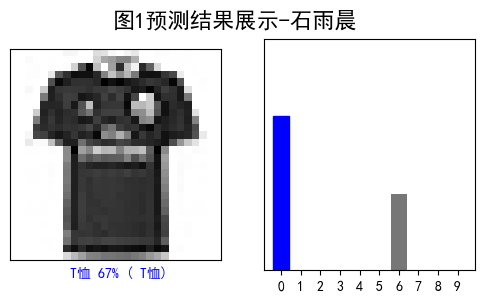

True: 数(1)


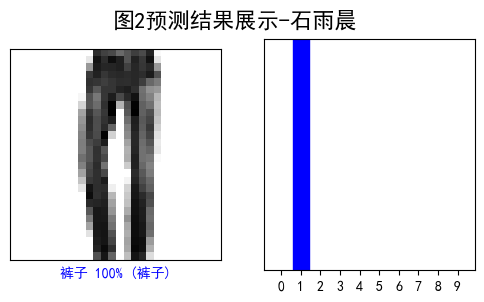

True: 数(2)


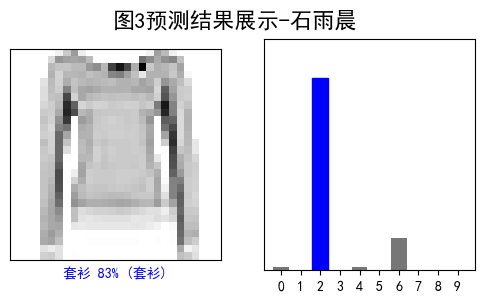

True: 数(3)


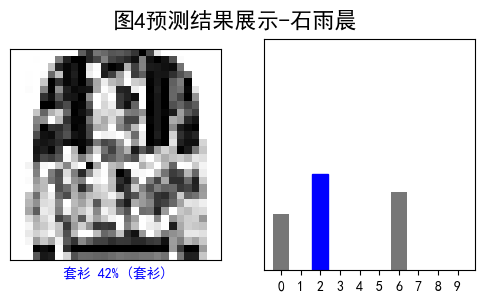

True: 数(4)


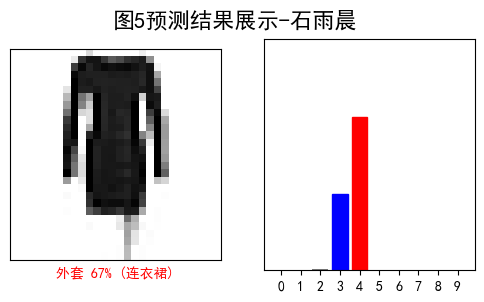

False: 数(1)


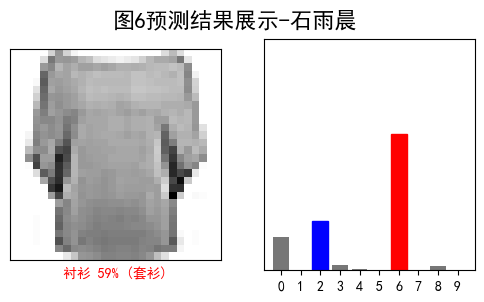

False: 数(2)


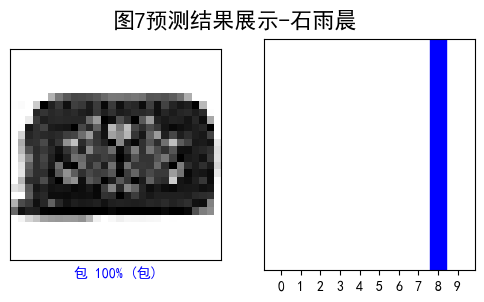

True: 数(5)


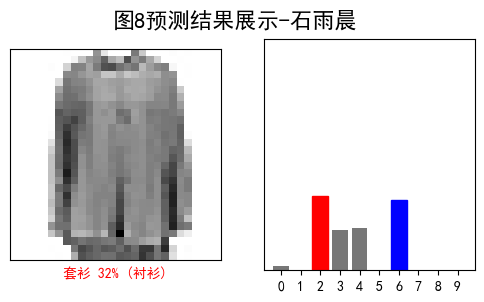

False: 数(3)


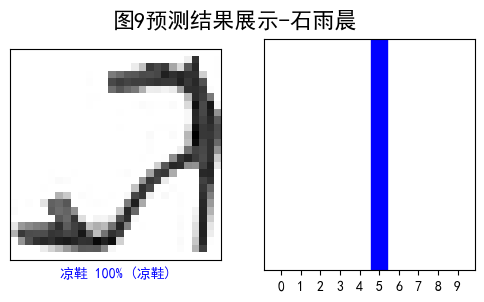

True: 数(6)


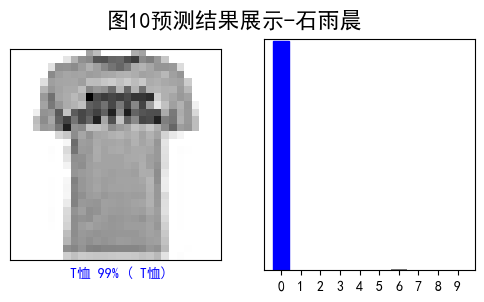

True: 数(7)


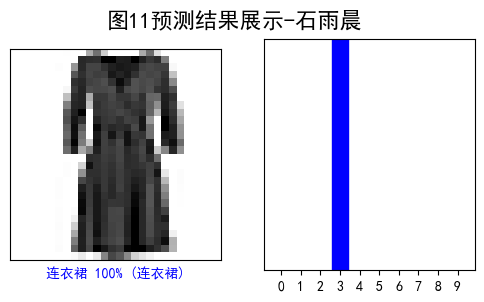

True: 数(8)


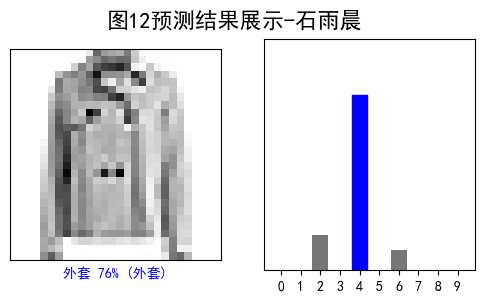

True: 数(9)


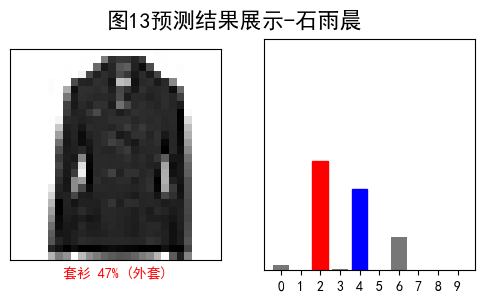

False: 数(4)


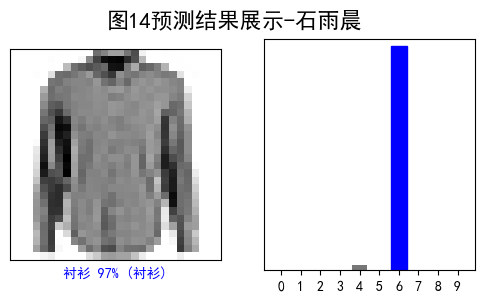

True: 数(10)


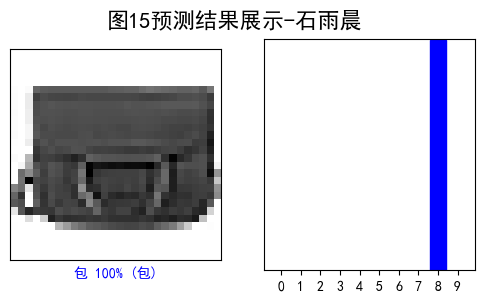

True: 数(11)


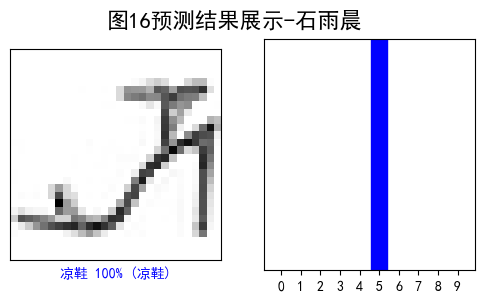

True: 数(12)


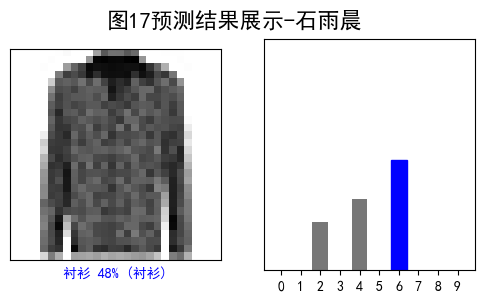

True: 数(13)


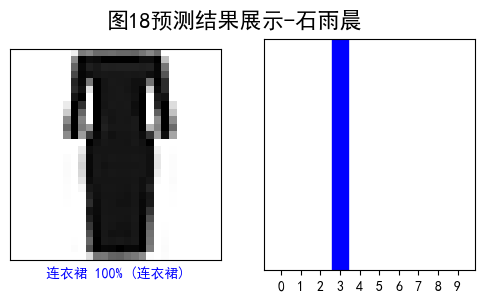

True: 数(14)


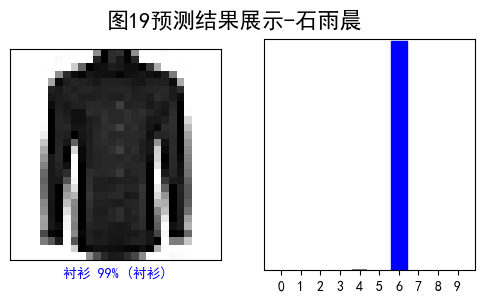

True: 数(15)


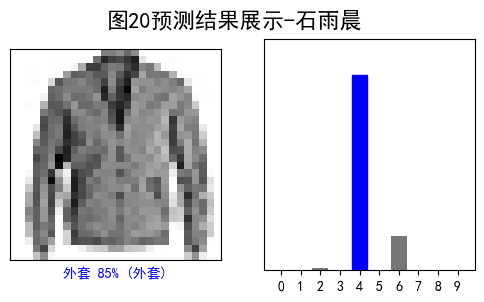

True: 数(16)


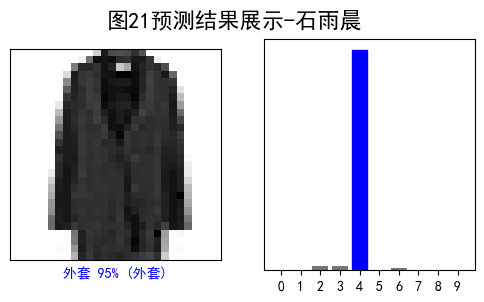

True: 数(17)


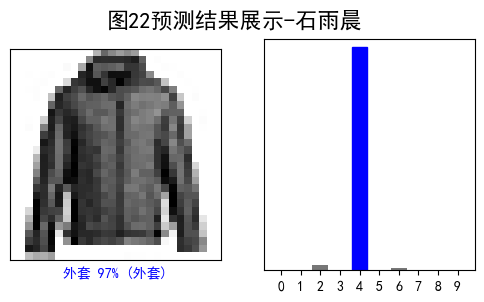

True: 数(18)


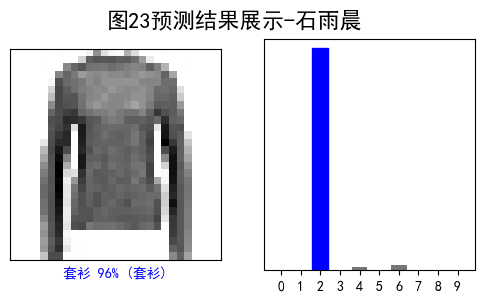

True: 数(19)


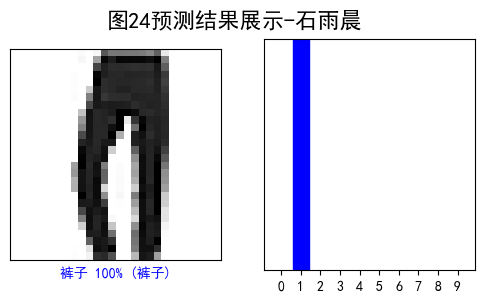

True: 数(20)


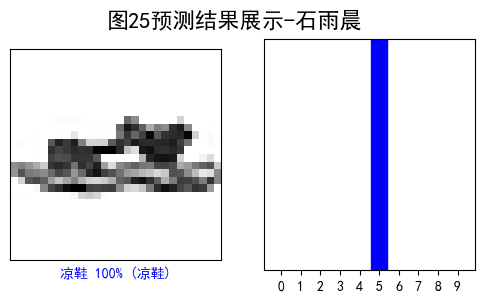

True: 数(21)


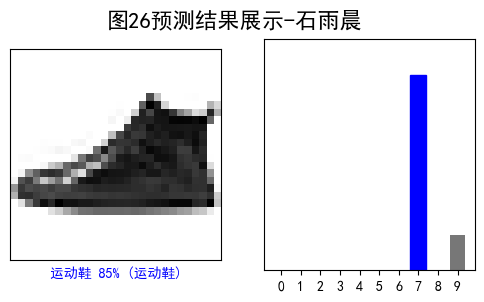

True: 数(22)


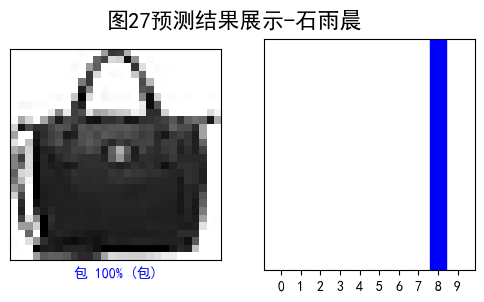

True: 数(23)


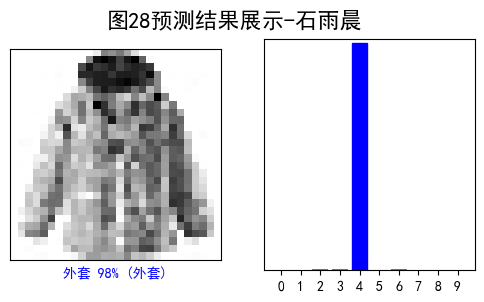

True: 数(24)


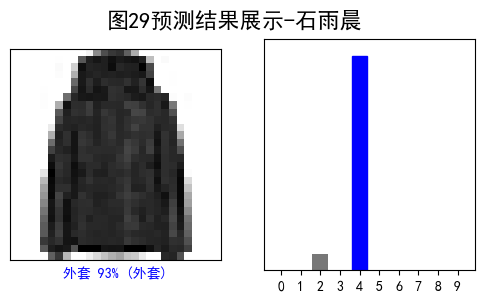

True: 数(25)


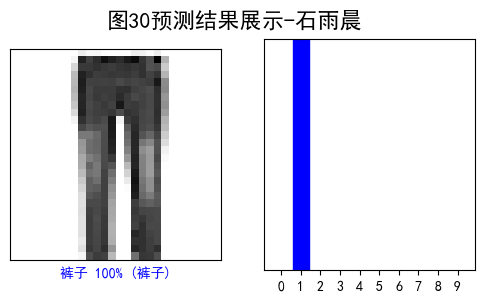

True: 数(26)


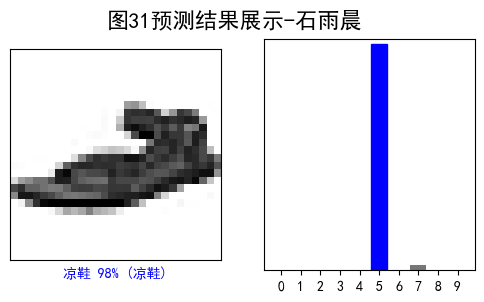

True: 数(27)


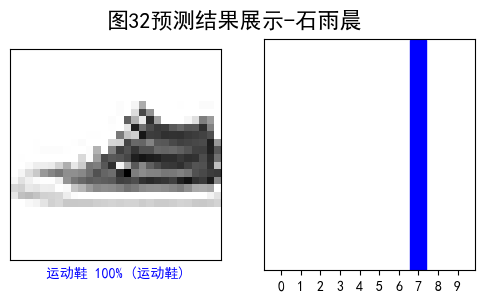

True: 数(28)


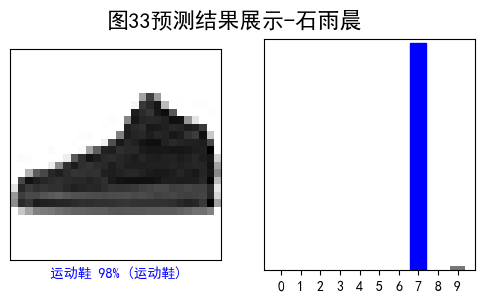

True: 数(29)


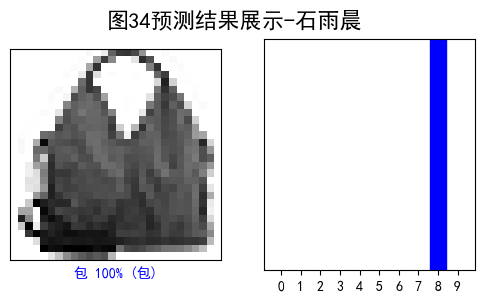

True: 数(30)


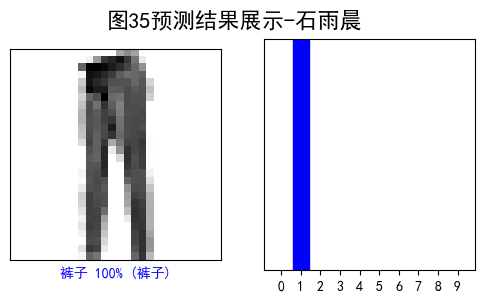

True: 数(31)


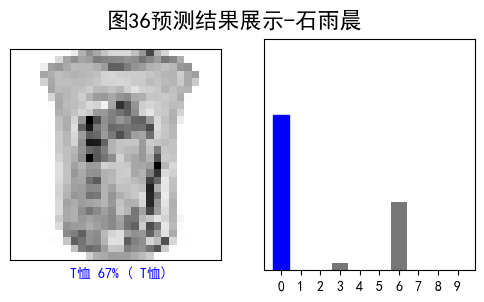

True: 数(32)


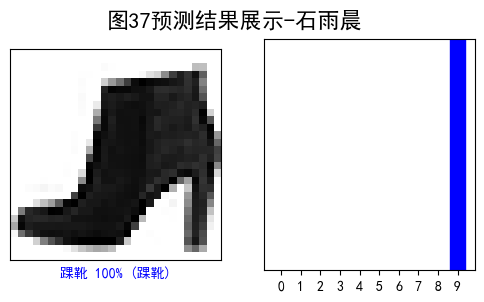

True: 数(33)


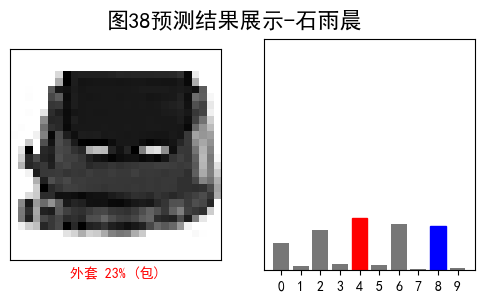

False: 数(5)


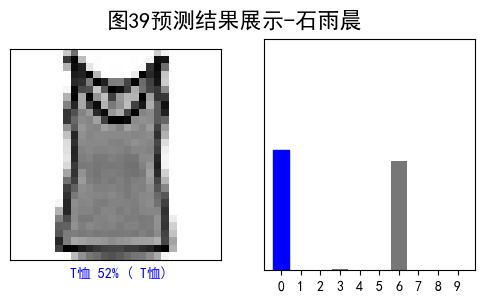

True: 数(34)


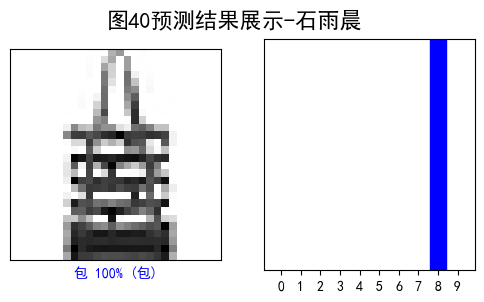

True: 数(35)


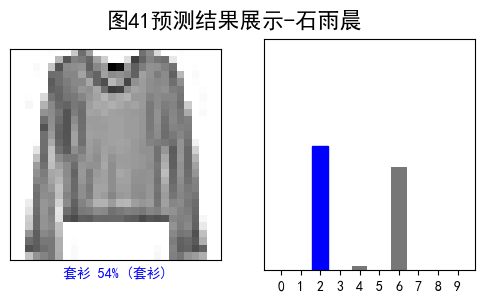

True: 数(36)


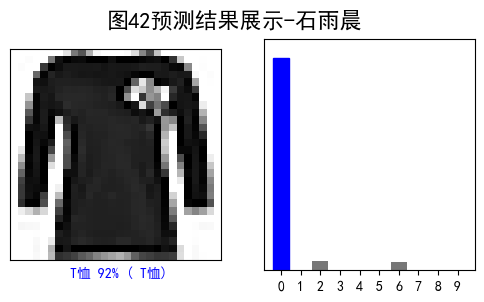

True: 数(37)


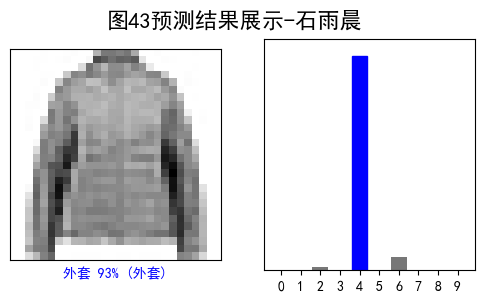

True: 数(38)


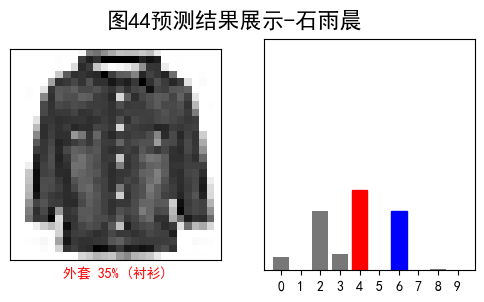

False: 数(6)


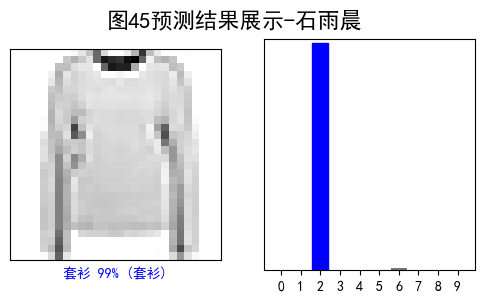

True: 数(39)


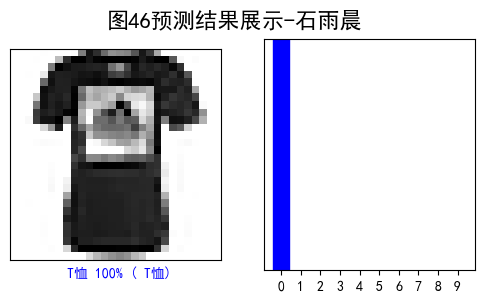

True: 数(40)


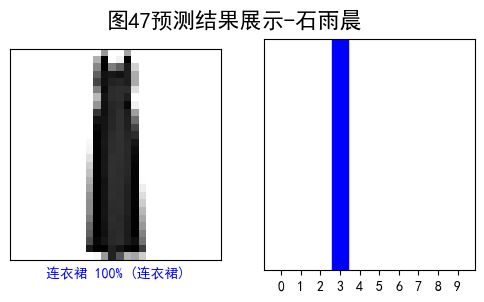

True: 数(41)


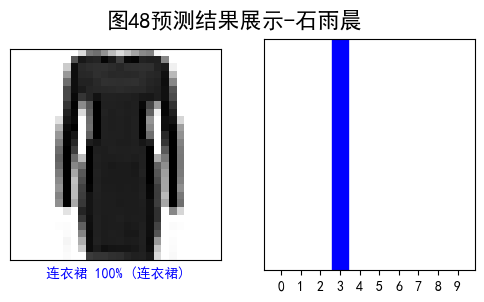

True: 数(42)


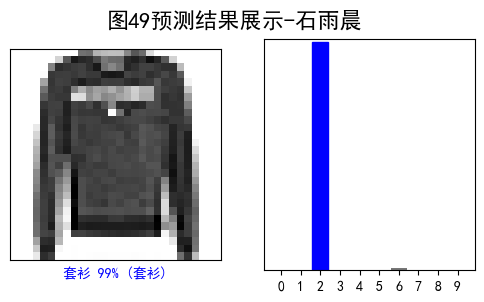

True: 数(43)


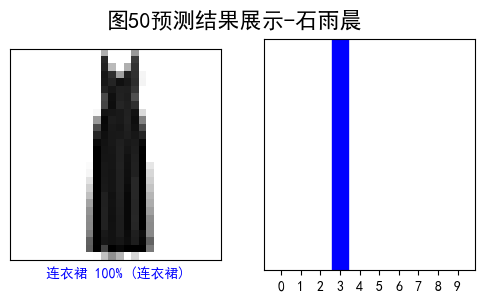

True: 数(44)

最终结果:
正确数: 44
错误数: 6
准确率: 88.00%


In [97]:
true_count = 0  # 正确预测计数
false_count = 0  # 错误预测计数

def view_predictions(i):
    """
    可视化单张图像的预测结果并判断预测是否正确
    """
    # 创建并排的两个子图（图像和概率分布）
    plt.figure(figsize=(6,3))
    plt.suptitle("图"+ str(int(i) + 1) +"预测结果展示-石雨晨", fontsize=16)
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)  # 显示图像及预测标签
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], test_labels)  # 显示概率分布条形图
    plt.show()

    # 获取预测类别和真实类别
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    
    # 判断预测是否正确
    if predicted_label == true_label:
        return True
    else:
        return False

# 前50张图像的预测统计
for i in range(50):
    if view_predictions(i):
        true_count += 1
        print(f"True: 数({true_count})")  # 打印正确预测计数
    else:
        false_count += 1
        print(f"False: 数({false_count})")  # 打印错误预测计数

# 打印最终统计结果
print("\n最终结果:")
print(f"正确数: {true_count}")
print(f"错误数: {false_count}")
print(f"准确率: {true_count / 50:.2%}")  # 计算并打印准确率

绘制几张图像及其预测结果

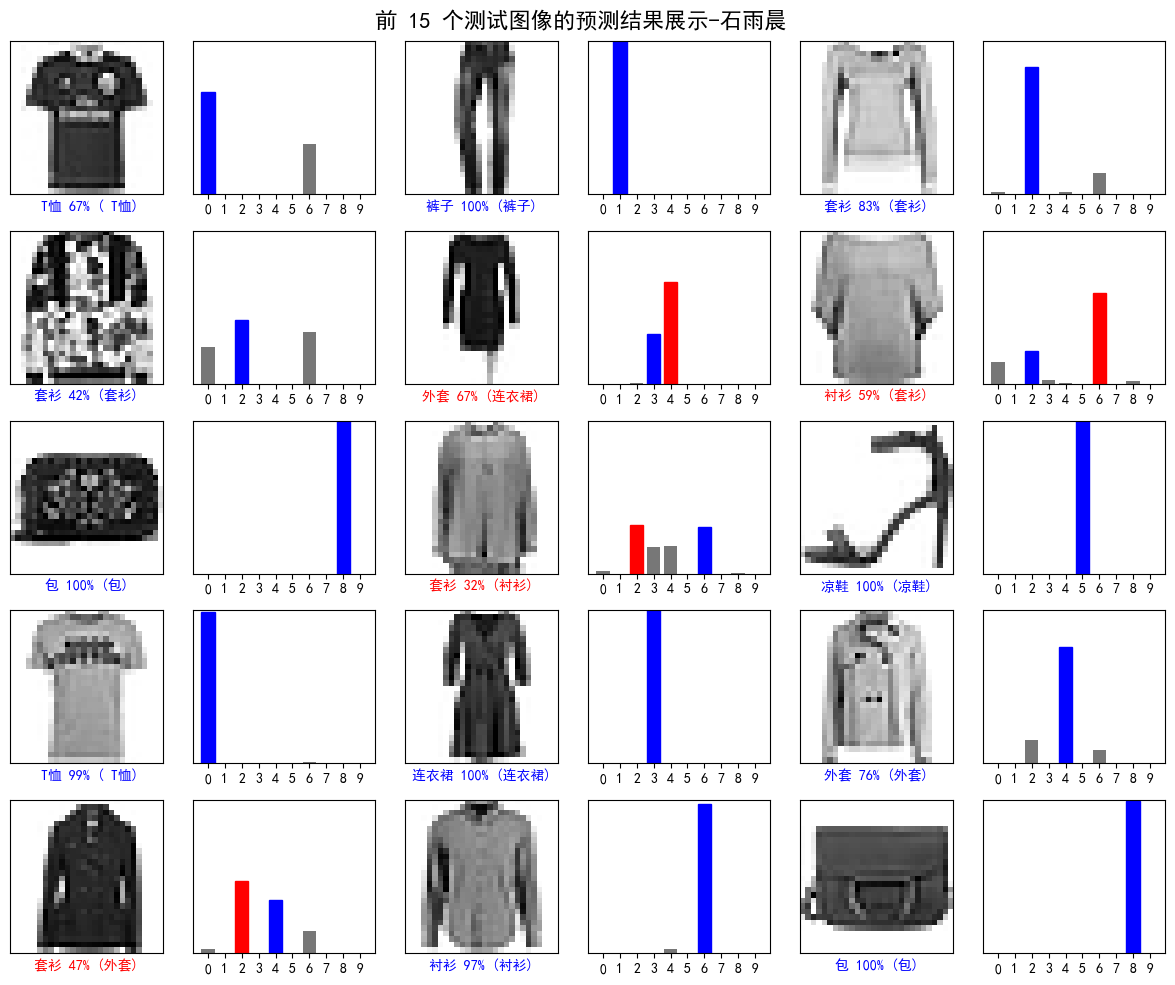

In [99]:
#绘制前 15 个测试图像及其预测结果的代码，正确预测用蓝色标记，错误预测用红色标记：
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.suptitle("前 15 个测试图像的预测结果展示-石雨晨", fontsize=16)
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 混淆矩阵以及错误样本可视化

In [101]:
from sklearn.metrics import confusion_matrix

# 重塑和归一化 test_data
test_data = test.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0  # 转换为 (10000, 28, 28, 1)

predictions_proba = model.predict(test_data) # 获取预测概率
predictions = np.argmax(predictions_proba, axis=1) # 转换为离散标签

cm = confusion_matrix(test_labels, predictions) # 计算混淆矩阵

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


对角线元素表示正确预测的样本数量。总的正确预测数除以样本总数即为总体准确率。
非对角线元素表示错误预测的样本数量，可以直观地看到模型的误分类情况。

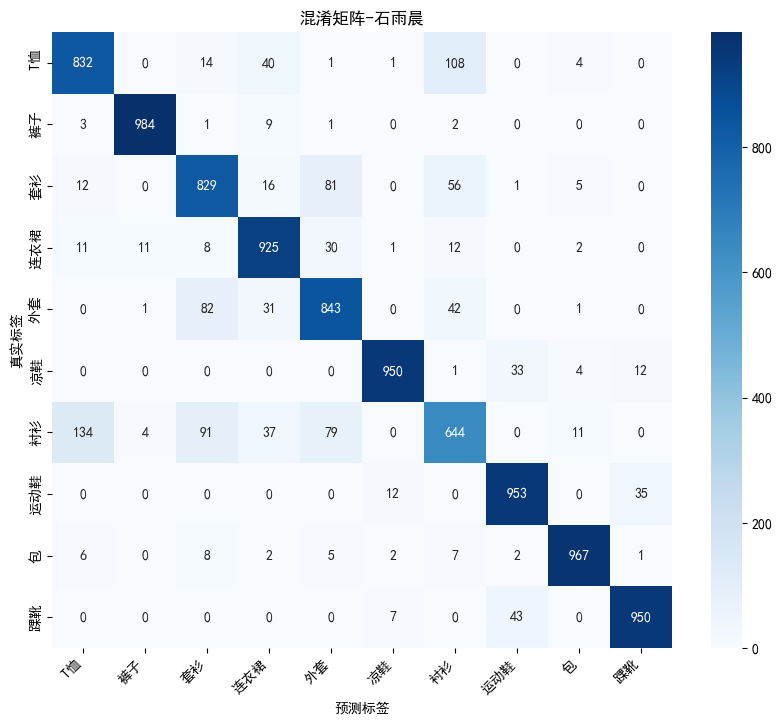

In [103]:
# 可视化
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
ax = plt.gca()

# 设置横轴标签并偏移半个单元格
ax.set_xticks(np.arange(10) + 0.5)  # 刻度位置向右偏移 0.5
ax.set_xticklabels(class_names, rotation=45, ha='right')  # 标签旋转并调整对齐
plt.title('混淆矩阵-石雨晨')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()

总体来看，对角线值占多数，说明模型整体表现不错

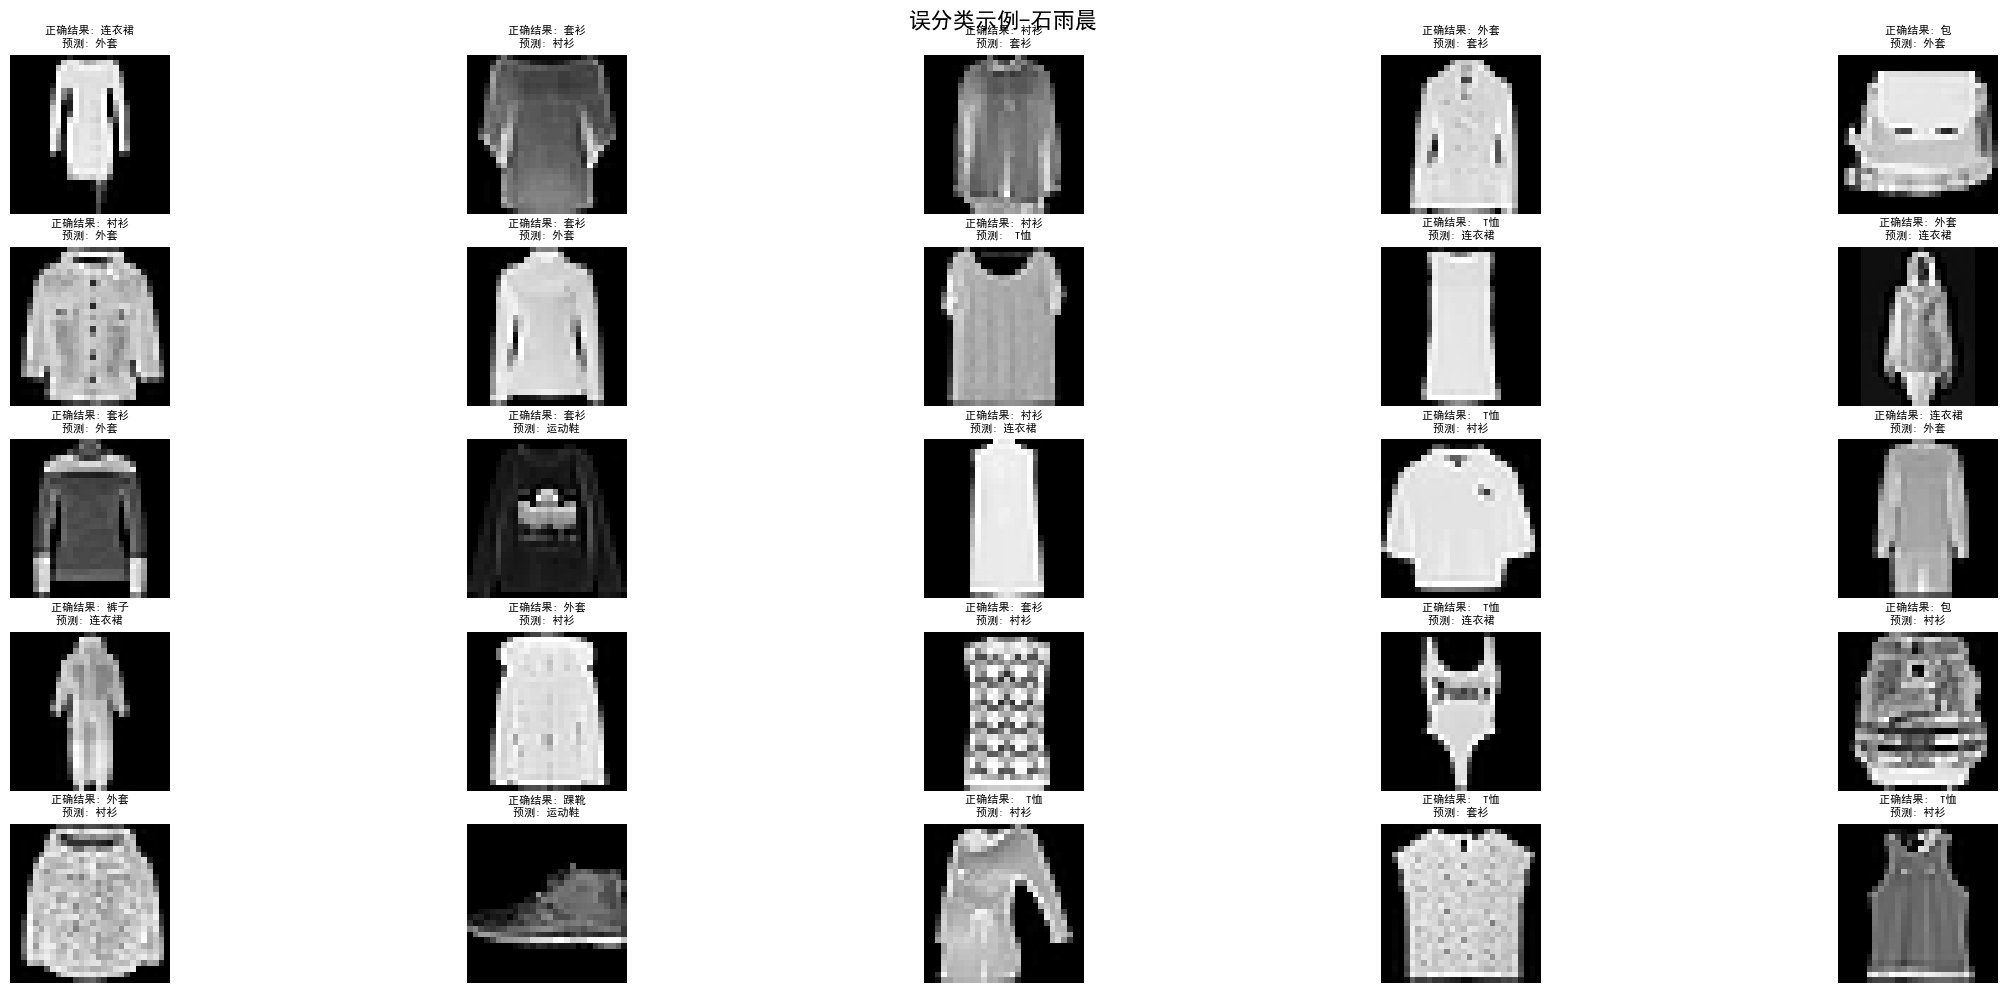

In [105]:
# 找到错误样本的索引
misclassified_idx = np.where(test_labels != predictions)[0]

# 可视化前 25 个错误样本
plt.figure(figsize=(25, 10))  # 保持图表大小
for i, idx in enumerate(misclassified_idx[:25]):
    plt.subplot(5, 5, i+1)  # 5 行 5 列
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.title(f'正确结果: {class_names[test_labels[idx]]}\n预测: {class_names[predictions[idx]]}', fontsize=8)
    plt.axis('off')
plt.suptitle('误分类示例-石雨晨', fontsize=16)
plt.tight_layout(pad=0.5, w_pad=0.05, h_pad=0.2)  # 调整间距参数
plt.show()

### 各类别预测准确率可视化

柱状图可以快速识别哪些类别的预测效果好（如裤子、包可能准确率较高），哪些类别效果差（如衬衫、套衫可能准确率较低）。

因为MLP无法有效捕捉图像的空间结构，衬衫、套衫、T恤图片的外形相似度较高，预测准确率均不是很高。

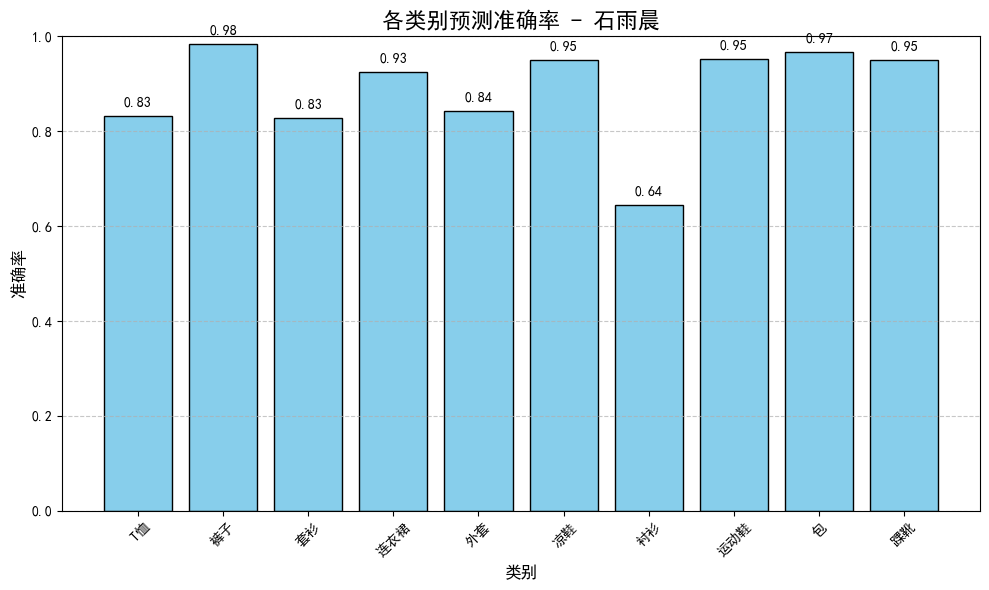

In [108]:
# 计算每个类别的准确率
class_accuracies = cm.diagonal() / cm.sum(axis=1)

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies, color='skyblue', edgecolor='black')
plt.title('各类别预测准确率 - 石雨晨', fontsize=16)
plt.xlabel('类别', fontsize=12)
plt.ylabel('准确率', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # 准确率范围 [0, 1]
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 在每个柱子上显示准确率数值
for i, acc in enumerate(class_accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('class_accuracy_barplot.png')

## 测试集预测结果保存

对测试集进行模型预测，并把预测结果保存到 CSV 文件里，方便后续的分析与评估。

In [111]:
# 保存结果到 CSV
evaluation_results = {
    '真实标签': test_labels,
    '预测标签': predictions,
    '是否正确':['True' if true == pred else 'False' for true, pred in zip(test_labels, predictions)]
}
test_df = pd.DataFrame(evaluation_results)
test_df.to_csv('./MLP_results.csv', index=False)
print("Results saved to MLP_results.csv")

Results saved to MLP_results.csv
